# 영화리뷰 데이터로 감성 예측(긍정 부정)
    1.특성 벡터화
        형태소 기반 토근화 Okt()
        TF-IDF 기반 백터 생성 : TdifVectorizer()
    2. 감성분석 모델 구축
        로지스틱회귀 모델
        하이퍼 파라메터 튜닝 : GridSearchCV()
    3. accuracy_score() : 정확도
    4. 새로운 텍스트에 대한 감성 예측    

# 텍스트 마이닝
    비정형의 텍스트 데이터로부터 패턴을 찾아내서 의미있는 정보를 추출하는 분석 과정 또는 기법
    프로세스
        텍스트 전처리 -> 특성 벡터화 -> 머신러닝 구축 학습 평가
        전처리에는 토근화, 불용어제거 표제어 추출, 형태소 분석등의 작업
# 특성 벡터화와 특성 추출
    텍스트를 구성하는 단어 기반의 특성 추출하고 이를 숫자형 값인 벡터로 표현
    대표적인 방법 BoW 와 Word2ve
    Bow : 모든 단어에 대해서 순서는 무시하고 반도만 고려해서 단어 얼마나 자주 등장하는지 -> 특성 벡터를 만드는 방법
        카운트 기반 벡터, TF-IDF기반 벡터화 방식
# 카운트 기반 벡터
    문서의 단어 빈도를 정리해서 단어 행렬(DTM) 을 구성 - 단어 출현 빈도가 높을수록 중요한 단어
    문서 d에 등장한 단어 t의 횟수는 tf(t,d)로 표현
    CounterVectoizer 모듈에 제공
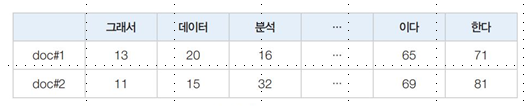
tf('데이터',doc#1) = 20

# TF-IDF 기반 벡터화
    특정 문서에 많이 나타나는 단어는 해당 문서의 단어 벡터에 가중치를 높임
    모든 문서에 많이 나타는 단어 범용적으로 사용하는 단어로 취급-> 가중치를 낮추는 방식
    - d에 등장하는 단어 t의 tf-idf  tf-idf(t,d) = tf(t,d) x idf(t,d)
    - idf(t,d) : 문서 빈도
    - df(d,t) : 단어 t가 포함된 문서의 개수
    -nd는 전체 문서의 수
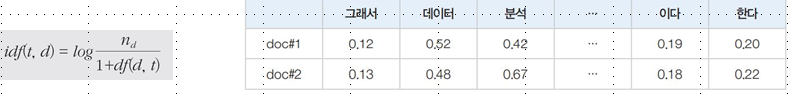    

# 감성분석(오피니언 마이닝)
    주관적인 의견이나 감성, 태도를 분석
    감성을 나타내는 단어를 기바니으로 긍정 또는 부정의 감정 결정 - 점수를 계산
# 토픽 모델링
    키워드 기반으로 주제를 추출하고 그 주제를 기준으로 문서를 분류(클러스터링) 및 분석
    토픽을 도출해서 동향을 파악하고 새로운 문서의 토피기을 예측하는 분석에 이용    

# LDA 
    디리클레 분포를 이용.. 문서에 잠재되어 있는 토픽을 추론하는 확률 모델 알고리즘
    하나의 문서는 여러 토픽으로 구성, 토픽분포에 따라서 단어의 분포가 결정된다고 가정
    토픽의 개수 K - 사용자가 지정하는 하이퍼 매개변수(파라메터)

### rating.txt :  네이버 영화 페이지 리뷰데이터를 수집
### rating_test.txt : 평가용 데이터
### rating_train.txt : 학습용 데이터
### target : label  1 ~ 10    ( 9,10긍정  1 ,  1~4 부정 0)

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('ratings_train.txt',encoding='utf-8',sep='\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
# 결측치 제거
train_df.dropna(subset=['document'],axis = 0,inplace=True)

In [5]:
train_df.reset_index(drop=True,inplace=True)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149995 entries, 0 to 149994
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [7]:
train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [8]:
import re
temp = '가나다asdfasdf라마!!!바사12457^^&*@#$%^'
re.sub(r'[^ㄱ-ㅎ가-힣]+',"",temp)

'가나다라마바사'

In [9]:
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅎ가-힣]+'," ",x))

In [10]:
train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [11]:
#  평가용 데이터 로드
test_df = pd.read_csv('ratings_test.txt',encoding='utf-8',sep='\t')

In [12]:
test_df.dropna(subset=['document'],axis = 0,inplace=True)

In [13]:
test_df.reset_index(drop=True,inplace=True)

In [14]:
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ㄱ-ㅎ가-힣]+'," ", x ) )

In [15]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [16]:
test_df = test_df[test_df['document'] != ' ']

In [17]:
test_df.reset_index(drop=True,inplace=True)

In [18]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
2,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
3,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0
4,7898805,음악이 주가 된 최고의 음악영화,1


# 분석 모델 구축
    형태소 단위로 토큰화한 한글 단어 - > tf-idf 방식을 적용 벡터화 작업을 수행

In [19]:
!pip install konlpy

In [20]:
from konlpy.tag import Okt
okt = Okt()

In [21]:
# 토큰화 작업을 수행할 함수를 작성
def okt_tokenizer(text):
    tokens =  okt.morphs(text)
    return tokens

In [31]:
# tf-idf로 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
# 모델
tfidf =  TfidfVectorizer(tokenizer=okt_tokenizer,
                ngram_range=(1,2),         #  토큰의 단어크기를 1~2개 단어로
                min_df=3,                  # 출현 빈도가 최소 3번 이상
                max_df= 0.9                # 최대 90% 이하인 것만 사용
               )

In [32]:
tfidf.fit(train_df['document'])  # tf-idf로 벡터화                
train_tdif =  tfidf.transform(train_df['document'])
test_tdif =  tfidf.transform(test_df['document'])

train_tdif.shape,test_tdif.shape

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((149995, 115039), (49555, 115039))

In [79]:
# 머신러닝 모델중에 로지스틱 회귀 모델을 이용
from sklearn.linear_model import LogisticRegression
result = []
for c in range(1,10):
    lr =  LogisticRegression(random_state=0,C=c,max_iter=200)
    lr.fit(train_tdif, train_df['label'])
    result.append(lr.score(test_tdif,test_df['label']))

C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\miniconda3\envs\py\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [ ]:
# 평가용 데이터도 tf-idf로 변경하고 정확성 accuracy_score 를 측정
#  사이킷런은 정확성평가하는 측정 라이브러리로 accuracy_score 가지고 있는데. 모든 머신러닝은 score라는 평가용 함수가 있고 같은 뜻

In [82]:
#result가 max일대 C의 값은 얼마이고.. 해당 값을 알아서 다시 머신러닝을 학습하고 그 모델을 가지고 이제 사용자가 뎃글을 입력하면
# 그 뎃글이 긍정인지 부정인지 판단
np.argmax(result)

3

In [83]:
result

[0.8560589244274039,
 0.8598526889314902,
 0.8613459792150137,
 0.8615679547976995,
 0.8611643628291797,
 0.8610634648370498,
 0.8610029260417718,
 0.8608414892543639,
 0.860498436081122]

In [84]:
lr =  LogisticRegression(random_state=0,C=4,max_iter=200)
lr.fit(train_tdif, train_df['label'])

LogisticRegression(C=4, max_iter=200, random_state=0)

In [110]:
# 평가문장...
st = input("평가 문장")

평가 문장 이 영화는 재미가 있을랑 말랑하네요.. 그런데 추천하고 싶지 않아요


In [111]:
rest = re.sub(r"[^ㄱ-ㅎ가-힣]+"," ", st)

In [112]:
rest = list(rest)
rest2 = ["".join(rest)]
rest2

['이 영화는 재미가 있을랑 말랑하네요 그런데 추천하고 싶지 않아요']

In [113]:
# 입력데이터에 대한 텍스트피처 벡터화
rest_tfidf = tfidf.transform(rest2)
# 감성분석
predict = lr.predict(rest_tfidf)

In [114]:
if predict[0] == 0:
    print("부정")
else:
    print("긍정")

부정
